In [ ]:
import numpy as np
from matplotlib  import pyplot as plt
from math import exp , pi ,sqrt
import math
import random
from sklearn.cluster import KMeans


def random_weight(n): # this function for generating randomweights
    randomweight=[]
    for i in range(n):
        randomweight.append(random.random())
    return np.array(randomweight)


def gauss(x,mean,sig): # this function for generating gaussian output
    return exp(-0.5*pow((x-mean)/sig,2))/(sqrt(2*pi)*sig)


def update_weight2(w21,y,yp,z,eta): #this function for updating last layer weights
    W21=w21+2*eta*(y-yp)*yp*(1-yp)*z/3
    return W21


K=2
def fit(X,Y): # this function calculate mean and SD for data
    data=list(zip(x, y))
    kmean=KMeans(n_clusters=2)
    kmean.fit(data)
    Centers=kmean.cluster_centers_
    mean=Centers
    max_dist=0
    for i in range(len(Centers)):
        for j in range(i+1,len(Centers)):
            dist=math.dist(Centers[i],Centers[j])
            if dist>max_dist:
                max_dist=dist
    

    return mean,max_dist/(sqrt(2)*K)




def train(x,y,mean,sd,w): # this function trains weights
    epoch=0
    eta=0.001
    yp=[0 for i in range(100)]
    E=15
    MSE=[]
    while E>8:
        epoch+=1
        E=0
        if epoch>20000:
          break;
        for i in range(100):
            z1=gauss(x[i],mean[0,0],sd)
            z2=gauss(x[i],mean[1,0],sd)
            Z=np.array(([z1,z2,1]))
            pre_out=np.dot(Z,w)
            yp[i]=pre_out
            w=update_weight2(w,y[i],yp[i],Z,eta)
            E=E+0.5*(y[i]-yp[i])**2
        MSE.append(E)  
        print(E)
    return w,MSE

num_samples=100
X=np.random.uniform(0.,1.,num_samples)
X=np.sort(X,axis=0)
noise=np.random.uniform(-0.1,0.1,num_samples)
y=np.sin(2*np.pi*X)+noise
x=2*np.pi*X
mean,sd=fit(x,y)
w21=random_weight(3)
w21,MSE=train(x,y,mean,sd,w21)
# z1=gauss(x[1],mean[0,0],sd)
# z2=gauss(x[1],mean[0,0],sd)
# Z=np.array(([z1,z2,1]))
# print(np.dot(Z,w21))

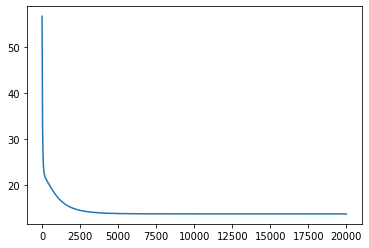

In [21]:
plt.plot(MSE)
plt.show()


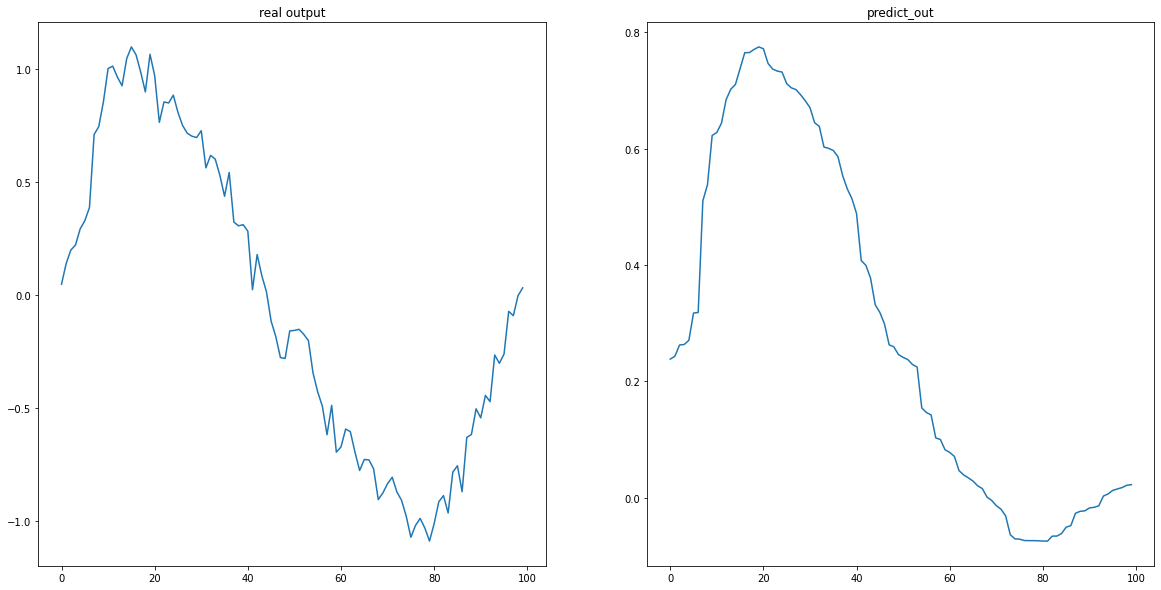

In [28]:
def predict(x,w,mean,sd): # this function predict output
  y_test=[]
  for i in range(len(x)):
    z1=gauss(x[i],mean[0,0],sd)
    z2=gauss(x[i],mean[1,0],sd)
    Z=np.array(([z1,z2,1]))
    out_test=np.dot(Z,w)
    y_test.append(out_test)
  return y_test

X_test=np.random.uniform(1.,2.,num_samples)
X_test=np.sort(X,axis=0)
x_test=2*np.pi*X


y_out_test=predict(x_test,w21,mean,sd)


noise=np.random.uniform(-0.1,0.1,num_samples)

y_out_real=np.sin(2*np.pi*X_test)+noise
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(y_out_real)
plt.title('real output')
plt.subplot(1,2,2)
plt.plot(y_out_test)
plt.title('predict_out')
plt.show()